In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import math

from sklearn.decomposition import PCA

## Étape 1
### 1- Lecture des données

In [2]:
df = pd.read_excel("autos-Saporta.xls", header=0, index_col=0)
display(df.head(50))
print(df.info())

,CYL,PUISS,LONG,LARG,POIDS,V.MAX
Modele,,,,,,
Alfasud TI,1350,79,393,161,870,165
Audi 100,1588,85,468,177,1110,160
Simca 1300,1294,68,424,168,1050,152
Citroen GS Club,1222,59,412,161,930,151
Fiat 132,1585,98,439,164,1105,165
Lancia Beta,1297,82,429,169,1080,160
Peugeot 504,1796,79,449,169,1160,154
Renault 16 TL,1565,55,424,163,1010,140
Renault 30,2664,128,452,173,1320,180


<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Alfasud TI to Lada 1300
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   CYL     18 non-null     int64
 1   PUISS   18 non-null     int64
 2   LONG    18 non-null     int64
 3   LARG    18 non-null     int64
 4   POIDS   18 non-null     int64
 5   V.MAX   18 non-null     int64
dtypes: int64(6)
memory usage: 1008.0+ bytes
None


_Les 6 variables sont du type quantitative discrète._

### 2- Standardisation des données en vue d’une analyse ACP

In [3]:
scaler = preprocessing.StandardScaler()
standardized = scaler.fit_transform(df)
print(standardized.round(4))

[[-0.7751 -0.2834 -1.8851 -1.0973 -1.569   0.5698]
 [-0.1202  0.0196  1.6058  2.001   0.2342  0.146 ]
 [-0.9292 -0.8389 -0.4422  0.2582 -0.2166 -0.5321]
 [-1.1273 -1.2933 -1.0007 -1.0973 -1.1182 -0.6168]
 [-0.1284  0.6761  0.256  -0.5164  0.1966  0.5698]
 [-0.9209 -0.1319 -0.2095  0.4518  0.0088  0.146 ]
 [ 0.4522 -0.2834  0.7215  0.4518  0.6098 -0.3626]
 [-0.1835 -1.4953 -0.4422 -0.71   -0.5172 -1.5492]
 [ 2.8408  2.1911  0.8611  1.2264  1.8119  1.8411]
 [-1.2814 -1.4953 -1.6058 -1.8719 -1.9822 -1.5492]
 [-0.1697  1.2316 -0.256  -0.9037 -0.1415  1.4173]
 [ 0.4577 -0.1319  0.5353  1.0328  0.6098 -0.0235]
 [ 1.0081  1.5346  1.6524  0.4518  2.1876  0.146 ]
 [ 0.9943  0.6761  0.2095  0.6455  0.0088  0.7393]
 [-0.5219 -0.2329 -0.1164 -0.1291  0.3769 -1.2102]
 [ 0.3779 -0.0814  0.3025 -0.3227  0.1215  0.5698]
 [ 0.9558  0.7771  1.1869  1.2264  0.3093  1.2478]
 [-0.9292 -0.8389 -1.3731 -1.0973 -0.9304 -1.5492]]


### 3- Vérification que les données sont centrées et réduites

In [4]:
print("Les moyennes des variables:\n", np.mean(standardized, axis = 0).round(3))
print("Les écarts types des variables\n", np.std(standardized, axis=0))

Les moyennes des variables:
 [-0. -0.  0.  0.  0.  0.]
Les écarts types des variables
 [1. 1. 1. 1. 1. 1.]


## Étape 2
### 1- Calcul de la matrice de corrélation des variables

In [5]:
corr_matrix = np.corrcoef(standardized.T)
display(corr_matrix.round(3))

array([[1.   , 0.797, 0.701, 0.63 , 0.789, 0.665],
       [0.797, 1.   , 0.641, 0.521, 0.765, 0.844],
       [0.701, 0.641, 1.   , 0.849, 0.868, 0.476],
       [0.63 , 0.521, 0.849, 1.   , 0.717, 0.473],
       [0.789, 0.765, 0.868, 0.717, 1.   , 0.478],
       [0.665, 0.844, 0.476, 0.473, 0.478, 1.   ]])

### 2-3-4 Calcul de valeurs propres de la matrice de corrélation, somme des valeurs propres et calcul de la proportion de variance expliquée

In [6]:
eigen_values, eigen_vectors = np.linalg.eig(corr_matrix)
print("Eigenvectors: \n",eigen_vectors.round(3),"\n")
print("Eigenvalues: \n", eigen_values, "\n")

sum_eigen_values = sum(eigen_values)
print("Somme des valeurs propres:", sum_eigen_values, "\n")
props = list(map(lambda ev: ev / sum_eigen_values, eigen_values))
print("Proportion de variance expliquée:\n" + str(props))

Eigenvectors: 
 [[-0.425 -0.124 -0.354  0.808  0.152 -0.059]
 [-0.422 -0.416 -0.185 -0.358 -0.294 -0.633]
 [-0.421  0.412  0.068 -0.28   0.731 -0.19 ]
 [-0.387  0.446  0.605  0.212 -0.478 -0.11 ]
 [-0.431  0.243 -0.484 -0.302 -0.305  0.581]
 [-0.359 -0.62   0.485 -0.074  0.189  0.459]] 

Eigenvalues: 
 [4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027] 

Somme des valeurs propres: 5.999999999999997 

Proportion de variance expliquée:
[0.7368096766014814, 0.14267704820766, 0.06217767957332889, 0.03565368150388502, 0.015466868667654747, 0.0072150454459900485]


_La somme des valeurs propres (eigenvalues) est égale au nombre de eigenvalues (le nombre de composantes principales). Du reste, avec une projection sur le premier axe, on conserve près de 74% de la variance initiale des données._

### 5- Détermination du nombre d’axes à retenir en utilisant le critère de coude

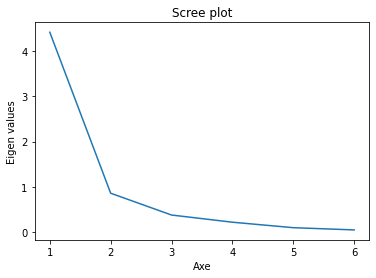

In [7]:
plt.plot(np.arange(1,len(df.columns) + 1),eigen_values)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Axe")
plt.show()

_On voit qu'à partir de 2 axes, il n'y a plus vraiment de gain dans l'explication de la variance; le coude se situe à 2 axes._

### 6- Réalisation d'une  ACP

In [8]:
acp = PCA(svd_solver='full')
C = acp.fit_transform(standardized)
n_component = acp.n_components_

print("Coordonées des individus dans l'espace factoriel:\n", C.round(3), "\n")
print("Nombre de composantes principales:", n_component, "\n")
print("Variance expliquée:", acp.explained_variance_, "\n")
print("Part de la variance expliquée:", acp.explained_variance_ratio_)

Coordonées des individus dans l'espace factoriel:
 [[-2.139  1.786  0.572  0.202 -0.301  0.054]
 [ 1.561 -1.527  1.315 -0.211  0.149 -0.327]
 [-1.119 -0.675  0.457 -0.168 -0.375  0.272]
 [-2.574  0.113  0.149 -0.017  0.227  0.263]
 [ 0.428  0.696 -0.193 -0.628  0.264 -0.037]
 [-0.304 -0.196  0.676 -0.556 -0.445  0.2  ]
 [ 0.684 -0.933 -0.257  0.203  0.209  0.154]
 [-1.948 -0.98  -0.62   0.63   0.293  0.109]
 [ 4.41   1.064 -0.594  0.847 -0.375  0.044]
 [-3.986  0.236 -0.303  0.265  0.278 -0.329]
 [ 0.438  1.912  0.025 -0.759  0.168 -0.054]
 [ 1.018 -0.842  0.217  0.303 -0.185  0.185]
 [ 2.941 -0.559 -1.244 -0.772  0.054 -0.057]
 [ 1.315  0.487  0.283  0.582 -0.067 -0.253]
 [-0.691 -0.898 -0.628 -0.358 -0.377 -0.122]
 [ 0.386  0.356 -0.076  0.103  0.527  0.339]
 [ 2.29   0.104  0.796  0.236  0.338 -0.157]
 [-2.709 -0.144 -0.574  0.096 -0.382 -0.283]] 

Nombre de composantes principales: 6 

Variance expliquée: [4.68090853 0.90641889 0.39501114 0.22650574 0.09826011 0.04583676] 

Part de

_Les eigen values ne sont pas exactement les mêmes, mais restent proches. Par contre, les part de variances expliquées sont les mêmes ainsi que le nombre d'axes. Les coordonnées des individus dans l'espace factoriel peuvent être interprétées ainsi: la première colonne contient les coordonées des individus sur le nouvel axe défini par la première composante principale. Donc sur une ligne graduée, le premier individu se situe à -2.139, le deuxième à 1.561, etc. et nous pouvons ainsi voir la distance et le regroupement des individus._

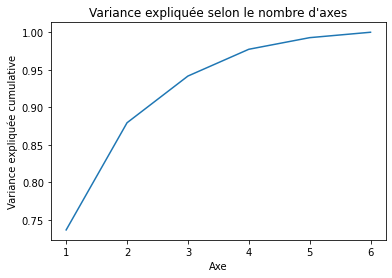

In [9]:
plt.plot(np.arange(1,len(df.columns) + 1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Variance expliquée selon le nombre d'axes")
plt.ylabel("Variance expliquée cumulative")
plt.xlabel("Axe")
plt.show()

### 7- Projection des individus sur les deux premièrs axes factoriels (plan factoriel)

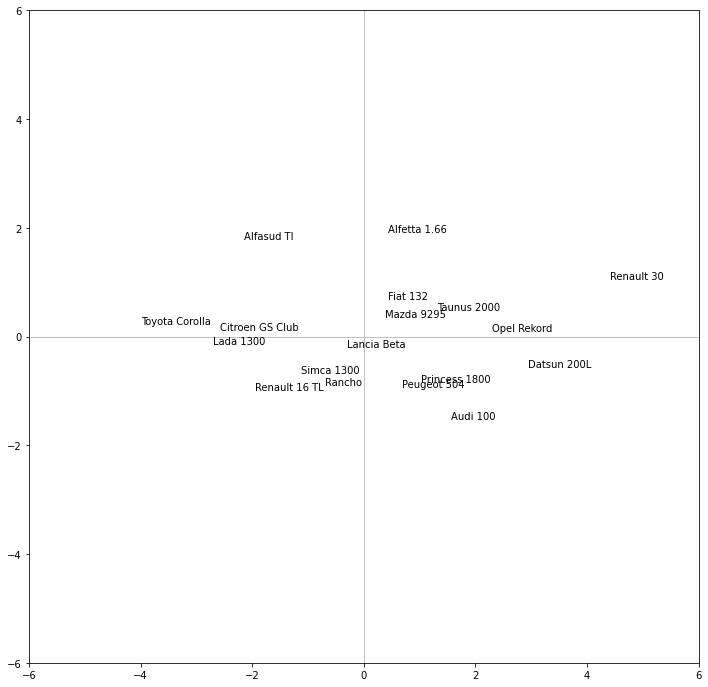

In [10]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée

#placement des étiquettes des observations
for i in range((df.shape[0])):
 # i correspond à la ligne, 0 à la cp1 et 1 à la cp2
 plt.annotate(df.index[i],(C[i,0],C[i,1]))

#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

plt.show()

_L'ACP nous permet de réduire la dimensionalité et ainsi pouvoir visualier le regroupement des individus. C'est-à-dire qu'on analyse la typologie des individus. Ainsi, sur le graphique ci-haut, on peut voir que sur l'axe principal (x), `Renaut 30` et `Toyota Corolla` sont à l'opposée, ce qui veut dire qu'elles sont éloignées en termes de ressemblance (seulement sur le premier axe, mais c'est aussi qui celui contient la quasi totalité de la variance!, donc la distance est significative. Ces deux voitures sont en effet moins éloignées si on les compare du point de vue de la $2^e$ composante principale. Dans cette visualisation, il s'agit plutôt de `Alfetta 1.66` et `Audi 100` qui sont les plus éloignées.) Par contre, on ne sait pas à quoi est dû cette différence._

## Étape 3
### 2- Détermination des deux premiers axes factoriels.

In [11]:
for r in eigen_vectors:
    print(r[:2])

[-0.42493602 -0.12419108]
[-0.42179441 -0.41577389]
[-0.42145993  0.41181773]
[-0.38692224  0.446087  ]
[-0.43051198  0.24267581]
[-0.35894427 -0.6198626 ]


_Le premier axe factoriel $u_1$ est la première colonne et le deuxième axe $u_2$, la deuxième colonne._

### 3- Évaluation de la qualité globale de la représentation

## $I_k = \frac {\lambda 1 + \lambda 2 + ... + \lambda_k} {\sum_{\alpha=1}^p \lambda_a}$

_Ici, la qualité globale de la représentation se mesure en faisant le rapport entre $\lambda_1 + \lambda 2$ et la somme des valeurs propres._

In [12]:
Ik = (eigen_values[0] + eigen_values[1]) / sum_eigen_values
Ik

0.8794867248091414

_Donc, dans la représentation que nous avons, la qualité globale préservée est de 88%._

### 4- Calcul de la contribution de chaque individu à l’inertie totale

## $d^2_i = \sum_{j=1}^K (x_i^j)^2$

In [13]:
di = (list(map(lambda r : sum(r), (standardized**2))))
print(pd.DataFrame({'ID':df.index,'di':di}).sort_values(by="di", ascending=False))

                 ID         di
8        Renault 30  21.789657
9    Toyota Corolla  16.290143
12      Datsun 200L  11.112624
0        Alfasud TI   8.225176
17        Lada 1300   7.922198
3   Citroen GS Club   6.780145
1          Audi 100   6.673755
16      Opel Rekord   6.083119
7     Renault 16 TL   5.636826
10     Alfetta 1.66   4.456770
13      Taunus 2000   2.452986
2        Simca 1300   2.159327
14           Rancho   1.963373
11    Princess 1800   1.952513
6       Peugeot 504   1.512793
4          Fiat 132   1.169124
5       Lancia Beta   1.134950
15       Mazda 9295   0.684521


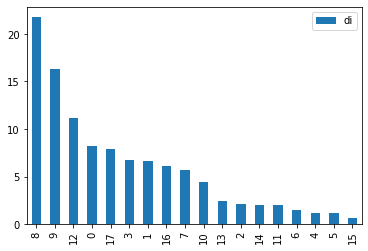

In [14]:
pd.DataFrame({'ID':df.index,'di':di}).sort_values(by="di", ascending=False).plot.bar()
None

_On peut voir que `Renault 30` et `Toyota Corolla` sont les deux observations qui contribuent le plus à l'inertie totale._

### 5- Evaluation de la qualité de la représentation de chaque individu sur les deux premiers axes
## $Qlt(i,\alpha) = \cos^2 (i,\alpha) = \frac {(c_i^a)^2} {d^2_i}$

In [15]:
scores_squared = C**2
cos2 = list(map(lambda s, d: s/d, scores_squared, di))

qual_axe_1 = list(map(lambda r: r[0], cos2))
qual_axe_2 = list(map(lambda r: r[1], cos2))

print(pd.DataFrame({'id':df.index,'COS2_1': qual_axe_1,'COS2_2': qual_axe_2}).sort_values(by="COS2_1", ascending=False))
print("\n" + "-"*80 + "\n")
print(pd.DataFrame({'id':df.index,'COS2_1': qual_axe_1,'COS2_2': qual_axe_2}).sort_values(by="COS2_2", ascending=False))

                 id    COS2_1    COS2_2
3   Citroen GS Club  0.976992  0.001879
9    Toyota Corolla  0.975219  0.003426
17        Lada 1300  0.926052  0.002607
8        Renault 30  0.892431  0.051920
16      Opel Rekord  0.861900  0.001790
12      Datsun 200L  0.778390  0.028137
13      Taunus 2000  0.704819  0.096496
7     Renault 16 TL  0.673539  0.170535
2        Simca 1300  0.580284  0.210694
0        Alfasud TI  0.556218  0.387670
11    Princess 1800  0.530947  0.362855
1          Audi 100  0.365334  0.349406
6       Peugeot 504  0.309202  0.575488
14           Rancho  0.243273  0.410469
15       Mazda 9295  0.217336  0.185337
4          Fiat 132  0.156579  0.413826
5       Lancia Beta  0.081555  0.033900
10     Alfetta 1.66  0.042978  0.820652

--------------------------------------------------------------------------------

                 id    COS2_1    COS2_2
10     Alfetta 1.66  0.042978  0.820652
6       Peugeot 504  0.309202  0.575488
4          Fiat 132  0.156579  0.4138

In [16]:
print("Somme de la qualité premier axe:" + str(sum(qual_axe_1)) + "\nSomme de la qualité deuxième axe:" + str(sum(qual_axe_2)))

Somme de la qualité premier axe:9.873048794028902
Somme de la qualité deuxième axe:4.10708861747759


_Pusiqu'il s'agit du $\cos^2$, les valeurs se situent dans la fourchette [0,1]. Si le $\cos^2$ est près de 1, alors l'individu est bien représenté par l'axe. Ainsi, on peut voir sur les deux tableau que pour le premier axe, certain individus sont très bien représentés alors que d'autres aucunement, comme c'est le cas pour `Alfetta 1.66`. On peut faire le même exercice pour le deuxième axe. On peut remarquer aussi que ce n'est pas parce qu'un individu est bien représenté sur le premier axe qu'il l'est aussi sur le deuxième. Enfin, on peut voir que la qualité est en générale meilleur sur le premier axe que sur le deuxième. En effet, la somme de la qualité est plus de deux fois supérieure pour le premier axe._

### Bonus - Contribution des individus sur les axes
## $Ctr(i,a) = \frac {(c_\alpha^i)^2} {\lambda _\alpha} = \frac {(\mbox{Score de i sur l'axe }\alpha)^2} {N \lambda_\alpha}$

In [17]:
contrib = list(map(lambda s : s / (df.shape[0] * eigen_values), scores_squared))

contrib_axe_1 = list(map(lambda r: r[0], contrib))
contrib_axe_2 = list(map(lambda r: r[1], contrib))

print(pd.DataFrame({'id':df.index,'CTR_1': contrib_axe_1,'CTR_2': contrib_axe_2}).sort_values(by="CTR_1", ascending=False))
print("\n" + "-"*80 + "\n")
print(pd.DataFrame({'id':df.index,'CTR_1': contrib_axe_1,'CTR_2': contrib_axe_2}).sort_values(by="CTR_2", ascending=False))

                 id     CTR_1     CTR_2
8        Renault 30  0.244369  0.073419
9    Toyota Corolla  0.199640  0.003622
12      Datsun 200L  0.108701  0.020292
17        Lada 1300  0.092194  0.001340
3   Citroen GS Club  0.083244  0.000827
16      Opel Rekord  0.065888  0.000707
0        Alfasud TI  0.057493  0.206933
7     Renault 16 TL  0.047711  0.062384
1          Audi 100  0.030640  0.151329
13      Taunus 2000  0.021727  0.015361
2        Simca 1300  0.015746  0.029525
11    Princess 1800  0.013028  0.045978
14           Rancho  0.006002  0.052300
6       Peugeot 504  0.005878  0.056499
10     Alfetta 1.66  0.002407  0.237357
4          Fiat 132  0.002300  0.031398
15       Mazda 9295  0.001870  0.008233
5       Lancia Beta  0.001163  0.002497

--------------------------------------------------------------------------------

                 id     CTR_1     CTR_2
10     Alfetta 1.66  0.002407  0.237357
0        Alfasud TI  0.057493  0.206933
1          Audi 100  0.030640  0.1513

_Sur les deux tableaux précédents, nous avons un classement en fonction de la contribution de chaque individu pour chaque axe. Le premier tableau est classé par rapport au premier axe, et le deuxième par rapport aux deuxième axe. Les individus se trouvant au haut de la liste sont déterminants pour cet axe._

### 6- Représentation du cercle de corrélation des variables
## $r(c,x^j) = \sqrt{\lambda} u_i$

In [18]:
sqrt_eigenvalues = np.sqrt(eigen_values)
coef_corr_lin = np.array(list(map(lambda v: v * sqrt_eigenvalues, eigen_vectors)))

coef_corr_lin_axe_1 = list(map(lambda r: abs(r[0]), coef_corr_lin))
coef_corr_lin_axe_2 = list(map(lambda r: abs(r[1]), coef_corr_lin))

print(pd.DataFrame({'id':df.columns,'COR_1': coef_corr_lin_axe_1,'COR_2': coef_corr_lin_axe_2}).sort_values(by="COR_1", ascending=False))
print("\n" + "-"*80 + "\n")
print(pd.DataFrame({'id':df.columns,'COR_1': coef_corr_lin_axe_1,'COR_2': coef_corr_lin_axe_2}).sort_values(by="COR_2", ascending=False))


      id     COR_1     COR_2
4  POIDS  0.905187  0.224532
0    CYL  0.893464  0.114906
1  PUISS  0.886858  0.384689
2   LONG  0.886155  0.381029
3   LARG  0.813536  0.412736
5  V.MAX  0.754710  0.573519

--------------------------------------------------------------------------------

      id     COR_1     COR_2
5  V.MAX  0.754710  0.573519
3   LARG  0.813536  0.412736
1  PUISS  0.886858  0.384689
2   LONG  0.886155  0.381029
4  POIDS  0.905187  0.224532
0    CYL  0.893464  0.114906


_Selon ce que l'on obtient, les variables sont toute assez bien correlées avec la première composante principale. Par contre, pour ce qui est de la deuxième composante principale, les corrélations sont plus faibles. Seul `V.MAX` est au dessus de 0.5._

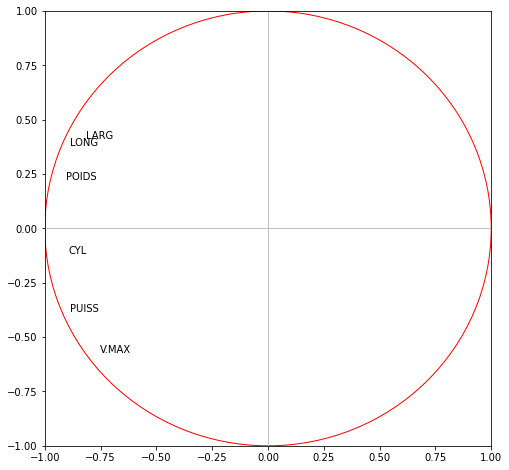

In [19]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#affichage des étiquettes (noms des variables)
for i in range(df.shape[1]):
 plt.annotate(df.columns[i],(coef_corr_lin[i,0],coef_corr_lin[i,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='red',fill=False)
axes.add_artist(cercle)

plt.show()

In [20]:
df.corr()

,CYL,PUISS,LONG,LARG,POIDS,V.MAX
CYL,1.000000,0.796628,0.701462,0.629757,0.788952,0.664934
PUISS,0.796628,1.000000,0.641362,0.520832,0.765293,0.844379
LONG,0.701462,0.641362,1.000000,0.849266,0.868090,0.475928
LARG,0.629757,0.520832,0.849266,1.000000,0.716874,0.472945
POIDS,0.788952,0.765293,0.868090,0.716874,1.000000,0.477596
V.MAX,0.664934,0.844379,0.475928,0.472945,0.477596,1.000000


<AxesSubplot:>

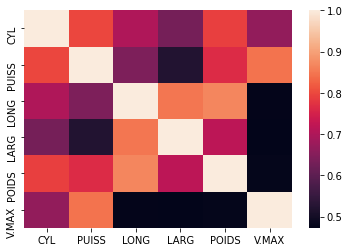

In [21]:
import seaborn
seaborn.heatmap(df.corr())

_On remarque que que `LONG` et `LARG` sont groupées, signalant une ressemblance dans ces variables. Ces deux variables sont elles-mêmes à l'opposé de `V.MAX` et `PUIS` sur le deuxième axe principal. Du reste, on peut voir que par rapport au premier axe, toutes les variables sont près de du bord, ce qui signifie de bonnes corrélations, ce qui est normal étant donné qu'il s'agit de la composante principale._

### 7- Évaluation de la qualité de représentation des variables
## $Qlt(j,k) = \cos^2 = r^2(c, x^j)$

In [22]:
cos2_coef_corr_lin = coef_corr_lin ** 2

cos2_coef_corr_lin_axe_1 = list(map(lambda r: r[0], cos2_coef_corr_lin))
cos2_coef_corr_lin_axe_2 = list(map(lambda r: r[1], cos2_coef_corr_lin))

print(pd.DataFrame({'id':df.columns,'COS2_1': cos2_coef_corr_lin_axe_1,'COS2_2': cos2_coef_corr_lin_axe_2}).sort_values(by="COS2_1", ascending=False))
print("\n" + "-"*80 + "\n")
print(pd.DataFrame({'id':df.columns,'COS2_1': cos2_coef_corr_lin_axe_1,'COS2_2': cos2_coef_corr_lin_axe_2}).sort_values(by="COS2_2", ascending=False))

      id    COS2_1    COS2_2
4  POIDS  0.819364  0.050415
0    CYL  0.798277  0.013203
1  PUISS  0.786517  0.147986
2   LONG  0.785270  0.145183
3   LARG  0.661841  0.170351
5  V.MAX  0.569588  0.328925

--------------------------------------------------------------------------------

      id    COS2_1    COS2_2
5  V.MAX  0.569588  0.328925
3   LARG  0.661841  0.170351
1  PUISS  0.786517  0.147986
2   LONG  0.785270  0.145183
4  POIDS  0.819364  0.050415
0    CYL  0.798277  0.013203


_Pour le premier axe, on peut voire que `V.MAX` est plus ou moins bien représentée, alors que pour le deuxième axe, toutes les variables ont une mauvaise représentation._

### 8- Calcul de la contribution de chaque variable aux deux premiers axes factoriels
## $Ctr(j,k) = \frac {r^2(c, x^j)} {\lambda_k}$

In [23]:
ctr_var = (cos2_coef_corr_lin / eigen_values)

ctr_var_axe_1 = list(map(lambda r: r[0], ctr_var))
ctr_var_axe_2 = list(map(lambda r: r[1], ctr_var))

print(pd.DataFrame({'id':df.columns,'CTR_1': ctr_var_axe_1,'CTR_2': ctr_var_axe_2}).sort_values(by="CTR_1", ascending=False))
print("\n" + "-"*80 + "\n")
print(pd.DataFrame({'id':df.columns,'CTR_1': ctr_var_axe_1,'CTR_2': ctr_var_axe_2}).sort_values(by="CTR_2", ascending=False))

      id     CTR_1     CTR_2
4  POIDS  0.185341  0.058892
0    CYL  0.180571  0.015423
1  PUISS  0.177911  0.172868
2   LONG  0.177628  0.169594
3   LARG  0.149709  0.198994
5  V.MAX  0.128841  0.384230

--------------------------------------------------------------------------------

      id     CTR_1     CTR_2
5  V.MAX  0.128841  0.384230
3   LARG  0.149709  0.198994
1  PUISS  0.177911  0.172868
2   LONG  0.177628  0.169594
4  POIDS  0.185341  0.058892
0    CYL  0.180571  0.015423


_Sur le premier axe, les variables ont environ toutes la même contribution. Pour ce qui est du deuxième axe, il y a une grande dominance de `V.MAX` avec 0.38423 du poids total._

### 9- Projection d'individus supplémentaires

In [31]:
indSupp = pd.read_excel("autos-Saporta-Supp.xlsx", header=0, index_col=0, engine='openpyxl')
display(df.head())

,CYL,PUISS,LONG,LARG,POIDS,V.MAX
Modele,,,,,,
Alfasud TI,1350,79,393,161,870,165
Audi 100,1588,85,468,177,1110,160
Simca 1300,1294,68,424,168,1050,152
Citroen GS Club,1222,59,412,161,930,151
Fiat 132,1585,98,439,164,1105,165


In [32]:
standardizedSupp = scaler.transform(indSupp)
print(standardizedSupp)

[[ 2.84080623  2.59511201  1.79199036  2.0010414   2.48812166  1.84112668]
 [-0.94571238 -0.53585556 -0.90763148 -1.87194195 -1.23091273  0.14597168]]


In [33]:
coordSupp = acp.transform(standardizedSupp)
print(coordSupp)

[[ 5.56329226  0.33860928 -0.46428878  0.40214608 -0.38981076 -0.08102064]
 [-2.21224139  1.25777905 -0.09304388 -0.35370189  0.648528    0.12473042]]


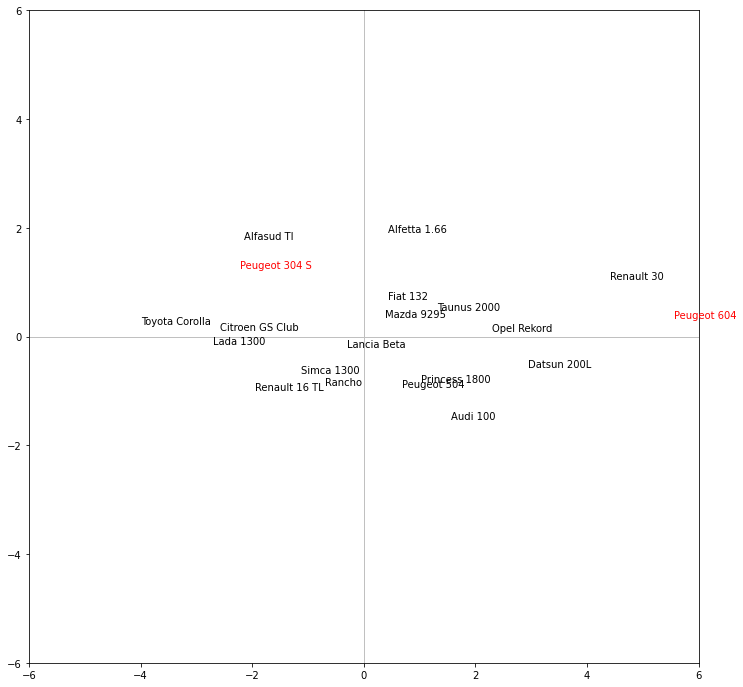

In [34]:
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée

#placement des étiquettes des observations
for i in range((df.shape[0])):
 # i correspond à la ligne, 0 à la cp1 et 1 à la cp2
 plt.annotate(df.index[i],(C[i,0],C[i,1]))
    
#placement des étiquettes des nouvelles observations
for i in range(coordSupp.shape[0]):
 plt.annotate(indSupp.index[i],(coordSupp[i,0],coordSupp[i,1]),color='red')

#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

plt.show()

_`Peugeot 304 S` se rapproche de `Alfasud TI` sur les deux axes principaux, alors que `Peugeot 604` est plus près de `Renault 30`._

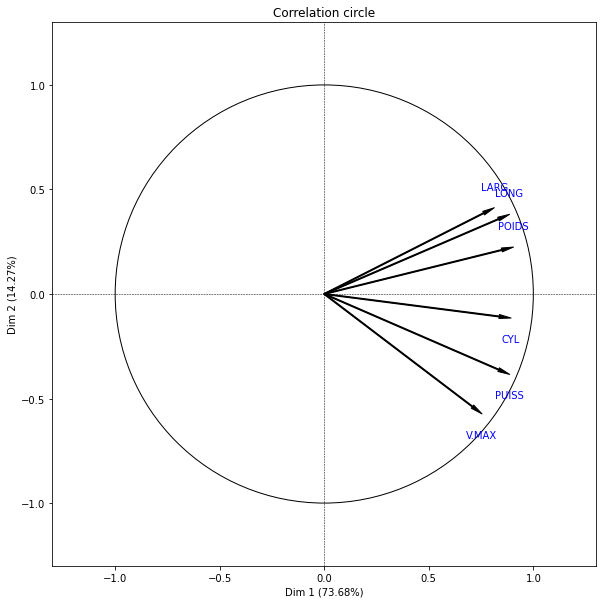

In [37]:
from fanalysis.pca import PCA
pca = PCA(std_unit=True,row_labels=df.index,col_labels=df.columns)
pca.fit_transform(standardized)
pca.correlation_circle(num_x_axis=1,num_y_axis=2, figsize=(10,10))

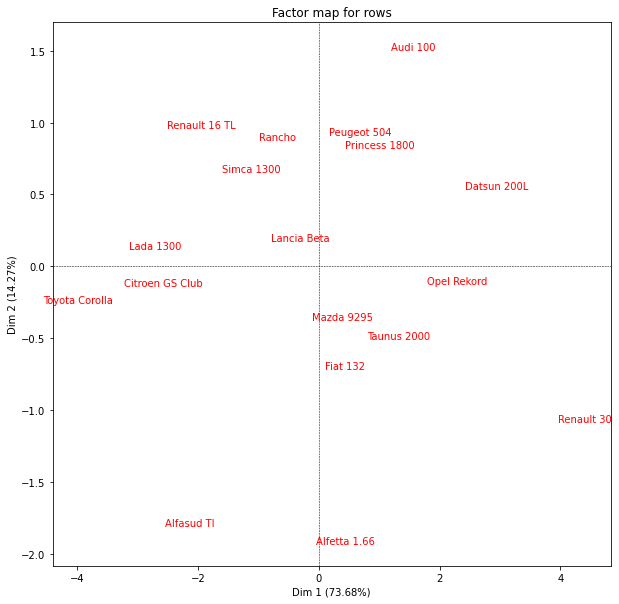

In [38]:
pca.mapping_row(num_x_axis=1,num_y_axis=2,figsize=(10,10))